In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import json
# For data splitting
from sklearn.model_selection import train_test_split, cross_val_score

# For scaling
from sklearn.preprocessing import StandardScaler

# For modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# For evaluation
from sklearn.metrics import mean_squared_error, r2_score

# For pipelines
from sklearn.pipeline import Pipeline

# For GridSearch
from sklearn.model_selection import GridSearchCV

# Import additional estimators
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import xgboost as xgb
from xgboost import XGBRegressor



In [8]:
df = pd.read_csv('data/auto_scout_final.csv')
# Create features and targey variable
X = df.drop('price', axis = 1)
y = df['price']

In [9]:
# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [10]:
# Standard scaler
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train) # train the scalar on the train dataset
X_test_scaled = standard_scaler.transform(X_test) # transform test datasets, make sure you don't fit to test data though!

Run and initial pass of all the major types of estimators (not fine-tuned) on the data and compare performance on train and test datasets. Try unscaled data first:

In [11]:
# empty dict to store evaluation results
results = {}

models = {'SVR': SVR(),
          'Random Forest': RandomForestRegressor(),
          'Gradient Boost': GradientBoostingRegressor(),
          'Lasso Regression': Lasso(),
          'XG Boost': XGBRegressor()}

for model_name, model in models.items():
    #unscaled data
    model.fit(X_train, y_train)
    # make predictions on the training data and the test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    # Gather evaluation metrics mean_squared_error and r2_score on both train and test datasets
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_MSE = mean_squared_error(y_train, y_train_pred)
    test_MSE = mean_squared_error(y_test, y_test_pred)
    train_RMSE = np.sqrt(train_MSE)
    test_RMSE = np.sqrt(test_MSE)
    # put these results into my results dict
    results[model_name] = {
        'Train R^2':train_r2,
        'Test R^2':test_r2,
        'Train RMSE':train_RMSE,
        'Test RMSE': test_RMSE
    }

# convert dict into df
results_unscaled = pd.DataFrame(results)
    

In [12]:
results_unscaled.T

,Train R^2,Test R^2,Train RMSE,Test RMSE
SVR,0.055281,0.062925,7252.321013,6904.640536
Random Forest,0.993551,0.952596,599.180517,1552.966249
Gradient Boost,0.941567,0.929793,1803.667987,1889.925405
Lasso Regression,0.899707,0.890865,2362.981372,2356.329187
XG Boost,0.987915,0.956820,820.251350,1482.156908


Now compare performance on the scaled data 

In [13]:
# empty dict to store evaluation results
results = {}

models = {'SVR': SVR(),
          'Random Forest': RandomForestRegressor(),
          'Gradient Boost': GradientBoostingRegressor(),
          'Lasso Regression': Lasso(),
          'XG Boost': XGBRegressor()}

for model_name, model in models.items():
    #unscaled data
    model.fit(X_train_scaled, y_train)
    # make predictions on the training data and the test data
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    # Gather evaluation metrics mean_squared_error and r2_score on both train and test datasets
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_MSE = mean_squared_error(y_train, y_train_pred)
    test_MSE = mean_squared_error(y_test, y_test_pred)
    train_RMSE = np.sqrt(train_MSE)
    test_RMSE = np.sqrt(test_MSE)
    # put these results into my results dict
    results[model_name] = {
        'Train R^2 scaled':train_r2,
        'Test R^2 scaled':test_r2,
        'Train RMSE scaled':train_RMSE,
        'Test RMSE scaled': test_RMSE
    }

# convert dict into df
results_scaled = pd.DataFrame(results)

In [14]:
results = pd.concat([results_unscaled, results_scaled], axis = 0)
results[sorted(results)]


,Gradient Boost,Lasso Regression,Random Forest,SVR,XG Boost
Train R^2,0.941567,0.899707,0.993551,0.055281,0.987915
Test R^2,0.929793,0.890865,0.952596,0.062925,0.956820
Train RMSE,1803.667987,2362.981372,599.180517,7252.321013,820.251350
Test RMSE,1889.925405,2356.329187,1552.966249,6904.640536,1482.156908
Train R^2 scaled,0.941567,0.900008,0.993373,0.008712,0.987915
Test R^2 scaled,0.929680,0.890716,0.953145,0.016612,0.956820
Train RMSE scaled,1803.667987,2359.439317,607.415629,7428.918463,820.251350
Test RMSE scaled,1891.445306,2357.932108,1543.944582,7073.205589,1482.156908


Scaling the data doesn't seem to affect performance across these models. XG Boost is best performing model, test RMSE = 1482, R^2 = 0.957

Log transforming the target variable improved linear regression a bit, can it improve the other models too?

In [15]:
# Apply log transformation to the target variable
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

In [16]:
# empty dict to store evaluation results
results = {}

models = {'SVR': SVR(),
          'Random Forest': RandomForestRegressor(),
          'Gradient Boost': GradientBoostingRegressor(),
          'Lasso Regression': Lasso(),
          'XG Boost': XGBRegressor()}

for model_name, model in models.items():
    #unscaled data
    model.fit(X_train, y_train_log)
    # make predictions on the training data and the test data
    y_train_pred_log = model.predict(X_train)
    y_test_pred_log = model.predict(X_test)
    # Inverse log transform the predictions and the true values to original scale, so can compare RMSE values across log and non-transformed target variable
    y_train_pred_original = np.exp(y_train_pred_log)
    y_test_pred_original = np.exp(y_test_pred_log)
    y_train_original = np.exp(y_train_log)
    y_test_original = np.exp(y_test_log)
    # Gather evaluation metrics mean_squared_error and r2_score on both train and test datasets
    train_r2 = r2_score(y_train_log, y_train_pred_log)
    test_r2 = r2_score(y_test_log, y_test_pred_log)
    train_MSE = mean_squared_error(y_train_original, y_train_pred_original)
    test_MSE = mean_squared_error(y_test_original, y_test_pred_original)
    train_RMSE = np.sqrt(train_MSE)
    test_RMSE = np.sqrt(test_MSE)
    # put these results into my results dict
    results[model_name] = {
        'Train R^2 log':train_r2,
        'Test R^2 log':test_r2,
        'Train RMSE log':train_RMSE,
        'Test RMSE log': test_RMSE
    }

# convert dict into df
results_logTarget = pd.DataFrame(results)


In [17]:
results_logTarget

,SVR,Random Forest,Gradient Boost,Lasso Regression,XG Boost
Train R^2 log,0.418725,0.994891,0.949012,0.637676,0.988452
Test R^2 log,0.401748,0.964075,0.940312,0.628680,0.964064
Train RMSE log,5481.985217,644.387172,1909.857965,4444.689957,852.900651
Test RMSE log,5306.539663,1515.519247,2006.700888,4245.152026,1466.117084


Best performance so far for Random Forest and XGBoost: XG Boost has R^2 = 0.964 RMSE = 1466, RF R^2 = 0.963 and RMSE = 1515

Compare training speed for RF and XG Boost


Compare training speed for XGBoost and RF

In [18]:
import time
rf =  RandomForestRegressor()
xgb = XGBRegressor()

# Measure time for Random Forest training
start_time_rf = time.time()
rf.fit(X_train, y_train_log)
end_time_rf = time.time()
rf_training_time = end_time_rf - start_time_rf

# Measure time for XGBoost training
start_time_xgb = time.time()
xgb.fit(X_train, y_train_log)
end_time_xgb = time.time()
xgb_training_time = end_time_xgb - start_time_xgb

# Print the training times
print(f"Random Forest training time: {rf_training_time:.4f} seconds")
print(f"XGBoost training time: {xgb_training_time:.4f} seconds")

Random Forest training time: 12.2158 seconds
XGBoost training time: 0.2167 seconds


Both quite fast? XGBoost slightly better performing and quicker to train (even though trees are trained sequencially rather than in parallel, shouldn't this make it slower to train than RF?), try to tune XGBoost to see if I can get even better performance

XGBoost has lots of params to tune! Can still do gridsearch across these as training time only 0.2 secs

In [33]:
# this gridsearch takes a while to run (>15min), don't run it every time we run the notebook
run_gridsearch = False # set to True whe you want to run gridsearch

xgb = XGBRegressor()
param_grid = {
    'n_estimators': [200, 300, 500],        # no of boosting rounds (trees), generally 500 upper limit? can get overfitting with more trees
    'learning_rate': [0.01, 0.05, 0.1],     
    'max_depth': [5, 7, 10],                 # this dataset quite big so deeper tree better?
    'subsample': [0.7, 0.8, 1.0],           # fraction of samples used to grow each tree. values between 0.7 and 1 commonly tested
    'colsample_bytree': [0.7, 0.8, 1.0],    # fraction of features used to grow each tree 
    'gamma': [0, 0.1, 0.2],                 # min loss reduction required to make a split
    'min_child_weight': [1, 2, 3],          # min number of samples needed in each leaf
}
if run_gridsearch:
   
    grid_search = GridSearchCV(estimator = xgb, param_grid= param_grid,
                           cv = 3, verbose = 1, n_jobs=-1)
    grid_search.fit(X_train, y_train_log)
    
    # Save the best parameters to avoid rerunning
    with open('best_params.json', 'w') as f:
        json.dump(grid_search.best_params_, f)
else:
    # Load the best parameters if grid search is skipped
    with open('best_params.json', 'r') as f:
        best_params = json.load(f)
    
    print("Loaded best params:", best_params)

# Get the best parameters and model performance
best_params = grid_search.best_params_
best_score_MSE = grid_search.best_score_ #this is neg value
best_score_RMSE = np.sqrt(best_score_MSE)

print(f"Best Parameters: {best_params}")
print(f"Best Score (RMSE): {best_score_RMSE:.4f}")


Loaded best params: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 2, 'n_estimators': 500, 'subsample': 0.8}
Best Parameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 2, 'n_estimators': 500, 'subsample': 0.8}
Best Score (RMSE): 0.9836


In [21]:
xgb_model = XGBRegressor(colsample_bytree = 0.7, gamma = 0, learning_rate = 0.05, max_depth = 7, min_child_weight = 2, n_estimators = 500, subsample = 0.8)

xgb_model.fit(X_train, y_train_log)
# make predictions on the training data and the test data
y_train_pred_log = xgb_model.predict(X_train)
y_test_pred_log = xgb_model.predict(X_test)
# Inverse log transform the predictions and the true values to original scale, so can compare RMSE values across log and non-transformed target variable
y_train_pred_original = np.exp(y_train_pred_log)
y_test_pred_original = np.exp(y_test_pred_log)
y_train_original = np.exp(y_train_log)
y_test_original = np.exp(y_test_log)
# Gather evaluation metrics mean_squared_error and r2_score on both train and test datasets
train_r2 = r2_score(y_train_log, y_train_pred_log)
test_r2 = r2_score(y_test_log, y_test_pred_log)
train_MSE = mean_squared_error(y_train_original, y_train_pred_original)
test_MSE = mean_squared_error(y_test_original, y_test_pred_original)
train_RMSE = np.sqrt(train_MSE)
test_RMSE = np.sqrt(test_MSE)

results = {
        'Train R^2':train_r2,
        'Test R^2':test_r2,
        'Train RMSE':train_RMSE,
        'Test RMSE': test_RMSE
    }

In [22]:
XGB_tuned = pd.DataFrame(results, index=['XGBoost'])
XGB_tuned

,Train R^2,Test R^2,Train RMSE,Test RMSE
XGBoost,0.992886,0.969465,659.362743,1384.558161


Performance is very good but model is still overfitting a little bit. Could decrease learning rate, and/or increase min_child_rate, gains likely to be quite small

Best result I can find using XGBoost is R^2 0.969, RMSE = $1385

Generate some basic plots looking at predictions vs observed

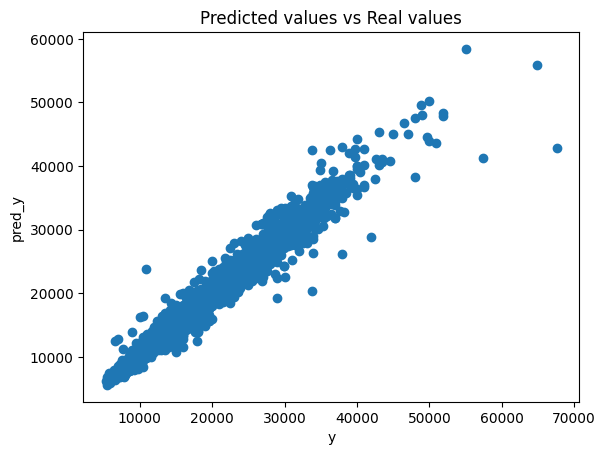

In [40]:
# Lok at predicted values plotted against real values
plt.scatter(y_test, y_test_pred_original)
plt.xlabel('y')
plt.ylabel('pred_y')
plt.title('Predicted values vs Real values')
plt.show()

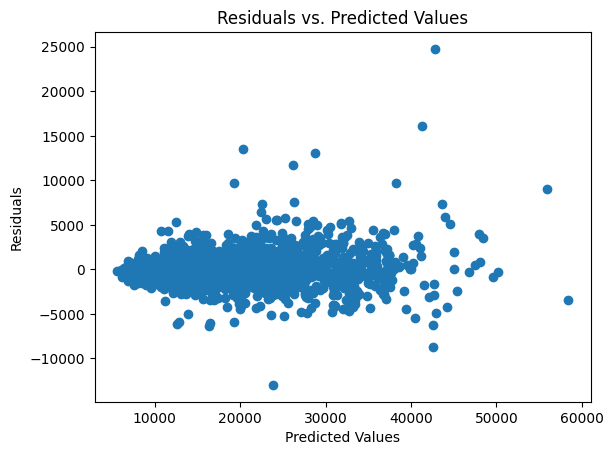

In [42]:
# Examine residuals
# Residuals
residuals = y_test - y_test_pred_original

# Residuals vs. Predicted
plt.scatter(y_test_pred_original, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

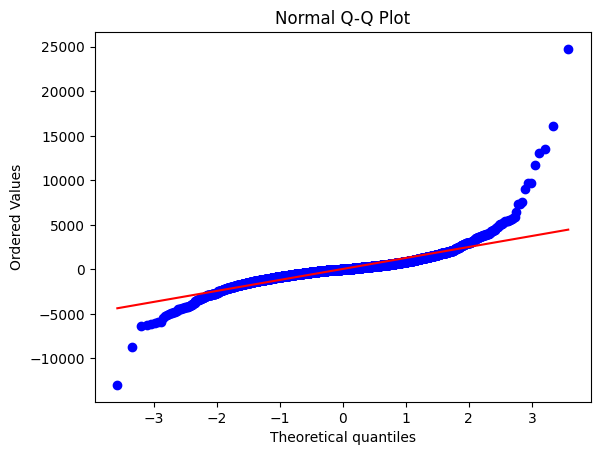

In [43]:
# Q-Q Plot (quantile-quantile plot) to look at the distribution of our residuals compared to normal distribution
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()

Have a look at feature importance using in-built xgb.feature_importance()
Look at 'gain' first: Gain represents the improvement in accuracy (or reduction in error) brought by a feature when it is used to split the data (effectiveness). Gain probably most important metric for XGBoost. Weight measures number of times a feature is used to split the data across all trees in the model (frequency). Cover measures the number of samples impacted by a feature's splits (scoope of influence of the feature)

In [34]:
# Get feature importance scores for all features, get gain, weight and cover measures
gain_importances = xgb_model.get_booster().get_score(importance_type='gain')
weight_importances = xgb_model.get_booster().get_score(importance_type='weight')
cover_importances = xgb_model.get_booster().get_score(importance_type='cover')


# store the dictionaries of raw feature importance values in a df
gain_df = pd.DataFrame({
    'Feature': list(gain_importances.keys()),
    'gain_importance': list(gain_importances.values())
})
weight_df = pd.DataFrame({
    'Feature': list(weight_importances.keys()),
    'weight_importance': list(weight_importances.values())
})
cover_df = pd.DataFrame({
    'Feature': list(cover_importances.keys()),
    'cover_importance': list(cover_importances.values())
})
xgb_feature_importance = pd.merge(gain_df, weight_df, on = 'Feature', how ='outer')
xgb_feature_importance = pd.merge(xgb_feature_importance, cover_df, on = 'Feature', how = 'outer')

In [35]:
# Have a look at top 20 features by gain importance
top20 = xgb_feature_importance.sort_values(by= 'gain_importance',ascending = False)[:20]
top20.head()

,Feature,gain_importance,weight_importance,cover_importance
78,hp,4.488245,1607.0,1653.946533
98,make_model_Renault Espace,3.024802,144.0,1479.694458
72,gears,2.138797,459.0,1518.662354
3,age,1.890445,1204.0,879.112976
92,make_model_Audi A3,1.491278,234.0,1329.111084


Text(0.5, 1.0, 'Cover importance')

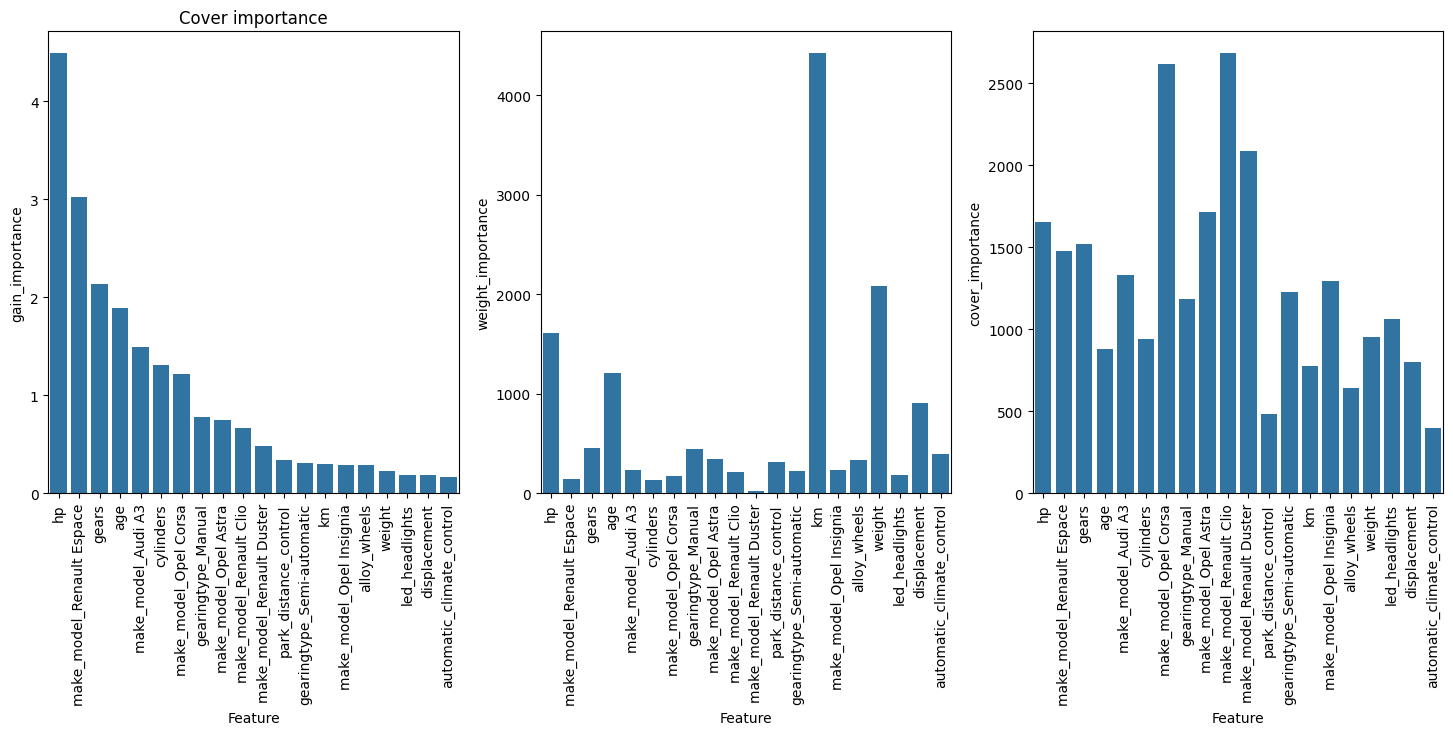

In [39]:
# Plot barplots of the three metrics, sorted by gain_importance
fig, axes = plt.subplots(1,3, figsize = (18,6))

# plot the gain_importance
sns.barplot(x = 'Feature', y = 'gain_importance', data = top20, ax = axes[0])
axes[0].tick_params(axis='x', rotation=90)  
axes[0].set_title('Gain importance')

sns.barplot(x = 'Feature', y = 'weight_importance', data = top20, ax = axes[1])
axes[1].tick_params(axis='x', rotation=90)  
axes[0].set_title('Weight importance')

sns.barplot(x = 'Feature', y = 'cover_importance', data = top20, ax = axes[2])
axes[2].tick_params(axis='x', rotation=90)  
axes[0].set_title('Cover importance')



Looks like hp most effective predictor of car price. km affects the most number of splits, 